In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_excel("14. Ongoing promos and placement by retailer USC CONFIDENTIAL.xlsx",sheet_name='In store placement and promo',header=1)

In [3]:
data.head()

,Geography,Product,Platform,WK Start,Wk End,Holiday,Chicken Program/Meal Deal,Secondary Deli,Secondary Bakery,Secondary Center store,...,Price per Unit,Price per Unit Any Merch,Price per Unit Any Price Reduction,Price per Unit Any Feature,Price per Unit Any Display,Average Weekly ACV Distribution,Average Weekly ACV Distribution Any Merch,Average Weekly ACV Distribution Any Price Reduction,Average Weekly ACV Distribution Any Feature,Average Weekly ACV Distribution Any Display
0,DeCA Total CONUS-RMA - Military,KH Hamburger Buns,Sandwich,2018-01-01,2018-01-07,NaN,No,No,No,No,...,2.69,2.69,NaN,NaN,2.69,84.076469,0.622376,NaN,NaN,0.622376
1,DeCA Total CONUS-RMA - Military,KH Hamburger Buns,Sandwich,2018-01-08,2018-01-14,NaN,No,No,No,No,...,2.69,NaN,NaN,NaN,NaN,89.470451,NaN,NaN,NaN,NaN
2,DeCA Total CONUS-RMA - Military,KH Hamburger Buns,Sandwich,2018-01-15,2018-01-21,NaN,No,No,No,No,...,2.69,2.69,NaN,NaN,2.69,89.025890,2.584781,NaN,NaN,2.584781
3,DeCA Total CONUS-RMA - Military,KH Hamburger Buns,Sandwich,2018-01-22,2018-01-28,NaN,No,No,No,No,...,2.69,2.69,NaN,NaN,2.69,87.043435,3.391945,NaN,NaN,3.391945
4,DeCA Total CONUS-RMA - Military,KH Hamburger Buns,Sandwich,2018-01-29,2018-02-04,NaN,No,No,No,No,...,2.69,2.69,NaN,NaN,2.69,89.405825,3.391945,NaN,NaN,3.391945


In [4]:
data['Chicken Program/Meal Deal'].fillna('No',inplace=True)
data['Secondary Deli'].fillna('No',inplace=True)
data['Secondary Bakery'].fillna('No',inplace=True)
data['Secondary Center store'].fillna('No',inplace=True)
data['Retail Coverage'].fillna('No',inplace=True)
data['Holiday'].fillna('No',inplace=True)
data['Holiday'].replace('Christmas/NY', 'Christmas',inplace = True)
data['Holiday'].replace('Easter Weeks', 'Easter',inplace = True)
data['Holiday'].replace('Easter Week ', 'Easter',inplace = True)


In [5]:
data['revenue']=data['Unit Sales']*data['Price per Unit']

In [6]:
holirev=data.loc[data['Holiday']!='No'].groupby(['Holiday','Platform']).agg({'revenue':'mean'}).reset_index()
holirev

,Holiday,Platform,revenue
0,Back to School,Sandwich,6786.240000
1,Christmas,Dinner Rolls,17182.381944
2,Christmas,Round and Sliced,2463.517005
3,Christmas,Sandwich,2545.310905
4,Easter,Dinner Rolls,10303.593013
5,Easter,Round and Sliced,1924.497792
6,Easter,Sandwich,3126.167630
7,Halloween,Dinner Rolls,7775.204843
8,Halloween,Round and Sliced,1798.385918
9,Halloween,Sandwich,2571.985693


In [16]:
noholirev=data.loc[data['Holiday']=='No'].groupby(['Platform','Holiday']).agg({'revenue':'mean'}).reset_index()
noholirev

,Platform,Holiday,revenue
0,Dinner Rolls,No,14875.861215
1,Round and Sliced,No,2853.387412
2,Sandwich,No,4066.738712


Text(0.1, 2000, 'Avg.revenue without holiday for Round and Sliced')

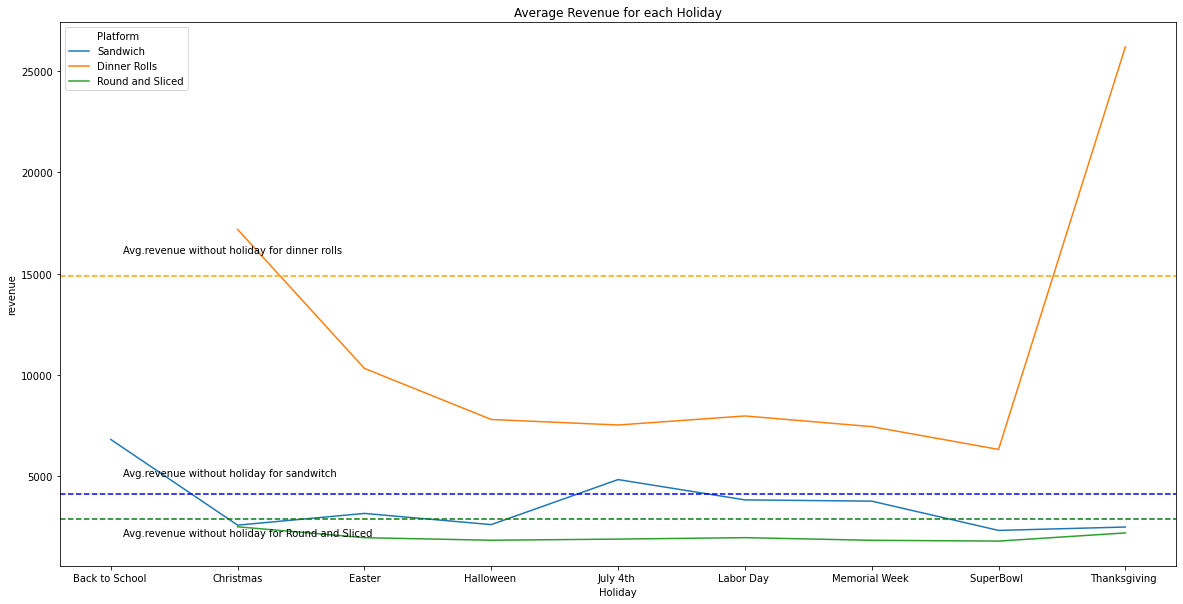

In [17]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Holiday", y="revenue", hue="Platform",data=holirev,dashes=False,ci=0)
plt.title('Average Revenue for each Holiday')
plt.axhline(y = noholirev.iloc[0,2], color = 'orange', linestyle = '--')
plt.axhline(y = noholirev.iloc[1,2], color = 'Green', linestyle = '--')
plt.axhline(y = noholirev.iloc[2,2], color = 'blue', linestyle = '--')
plt.annotate("Avg.revenue without holiday for dinner rolls",
(0.1,16000),
color = "black",
fontsize = 10)
plt.annotate("Avg.revenue without holiday for sandwitch",
(0.1,5000),
color = "black",
fontsize = 10)
plt.annotate("Avg.revenue without holiday for Round and Sliced",
(0.1,2000),
color = "black",
fontsize = 10)

In [8]:
ChickenProgram=data.loc[data['Chicken Program/Meal Deal']=='Yes']
SecondaryDeli=data.loc[data['Secondary Deli']=='Yes']
SecondaryBakery=data.loc[data['Secondary Bakery']=='Yes']
Centerstore=data.loc[data['Secondary Center store']=='Yes']
RetailCoverage=data.loc[data['Retail Coverage']=='Yes']

In [9]:
NoChickenProgram=data.loc[data['Chicken Program/Meal Deal']=='No']
NoSecondaryDeli=data.loc[data['Secondary Deli']=='No']
NoSecondaryBakery=data.loc[data['Secondary Bakery']=='No']
NoCenterstore=data.loc[data['Secondary Center store']=='No']
NoRetailCoverage=data.loc[data['Retail Coverage']=='No']

,Platform,revenue
0,Dinner Rolls,6467.924617
1,Round and Sliced,4819.418726
2,Sandwich,25.450000


In [10]:
NoChickenProgram



,Geography,Product,Platform,WK Start,Wk End,Holiday,Chicken Program/Meal Deal,Secondary Deli,Secondary Bakery,Secondary Center store,...,Price per Unit Any Merch,Price per Unit Any Price Reduction,Price per Unit Any Feature,Price per Unit Any Display,Average Weekly ACV Distribution,Average Weekly ACV Distribution Any Merch,Average Weekly ACV Distribution Any Price Reduction,Average Weekly ACV Distribution Any Feature,Average Weekly ACV Distribution Any Display,revenue
0,DeCA Total CONUS-RMA - Military,KH Hamburger Buns,Sandwich,2018-01-01,2018-01-07,No,No,No,No,No,...,2.690000,NaN,NaN,2.69,84.076469,0.622376,NaN,NaN,0.622376,3098.88
1,DeCA Total CONUS-RMA - Military,KH Hamburger Buns,Sandwich,2018-01-08,2018-01-14,No,No,No,No,No,...,NaN,NaN,NaN,NaN,89.470451,NaN,NaN,NaN,NaN,3989.27
2,DeCA Total CONUS-RMA - Military,KH Hamburger Buns,Sandwich,2018-01-15,2018-01-21,No,No,No,No,No,...,2.690000,NaN,NaN,2.69,89.025890,2.584781,NaN,NaN,2.584781,3722.96
3,DeCA Total CONUS-RMA - Military,KH Hamburger Buns,Sandwich,2018-01-22,2018-01-28,No,No,No,No,No,...,2.690000,NaN,NaN,2.69,87.043435,3.391945,NaN,NaN,3.391945,3865.53
4,DeCA Total CONUS-RMA - Military,KH Hamburger Buns,Sandwich,2018-01-29,2018-02-04,No,No,No,No,No,...,2.690000,NaN,NaN,2.69,89.405825,3.391945,NaN,NaN,3.391945,5484.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119985,KR Smiths Corp,KH 12 CT Butter,Dinner Rolls,2020-06-29,2020-07-05,No,No,No,No,No,...,3.464255,2.890932,3.464255,NaN,97.866593,97.866593,6.998392,97.866593,NaN,10299.23
119986,KR Smiths Corp,KH 24 CT Original,Dinner Rolls,2020-06-29,2020-07-05,No,No,No,No,No,...,5.802000,5.802000,NaN,NaN,97.084658,5.671364,5.671364,NaN,NaN,18268.88
119987,KR Smiths Corp,KH Mini Subs,Sandwich,2020-06-29,2020-07-05,No,No,No,No,No,...,2.873763,2.873763,NaN,NaN,82.617254,73.706034,73.706034,NaN,NaN,3085.37
119988,KR Smiths Corp,KH 24 CT Butter,Dinner Rolls,2020-06-29,2020-07-05,No,No,No,No,No,...,4.630976,4.630976,NaN,NaN,24.066519,5.854496,5.854496,NaN,NaN,1017.69


In [11]:
CPrevenuehol=ChickenProgram.groupby(['Platform','Holiday']).agg({'revenue':'mean'}).reset_index()
SDrevenuehol=SecondaryDeli.groupby(['Platform','Holiday']).agg({'revenue':'mean'}).reset_index()
SBrevenuehol=SecondaryBakery.groupby(['Platform','Holiday']).agg({'revenue':'mean'}).reset_index()
Centerstorerevhol=Centerstore.groupby(['Platform','Holiday']).agg({'revenue':'mean'}).reset_index()
RetailCoveragerevhol=RetailCoverage.groupby(['Platform','Holiday']).agg({'revenue':'mean'}).reset_index()


In [12]:
CPrevenuehol


,Platform,Holiday,revenue
0,Dinner Rolls,Christmas,2851.630390
1,Dinner Rolls,Easter,3015.698711
2,Dinner Rolls,Halloween,3598.134542
3,Dinner Rolls,July 4th,3149.497037
4,Dinner Rolls,Labor Day,3505.815226
5,Dinner Rolls,Memorial Week,2918.457966
6,Dinner Rolls,No,7002.496301
7,Dinner Rolls,SuperBowl,3096.803728
8,Dinner Rolls,Thanksgiving,3692.435256
9,Round and Sliced,Christmas,4187.674000


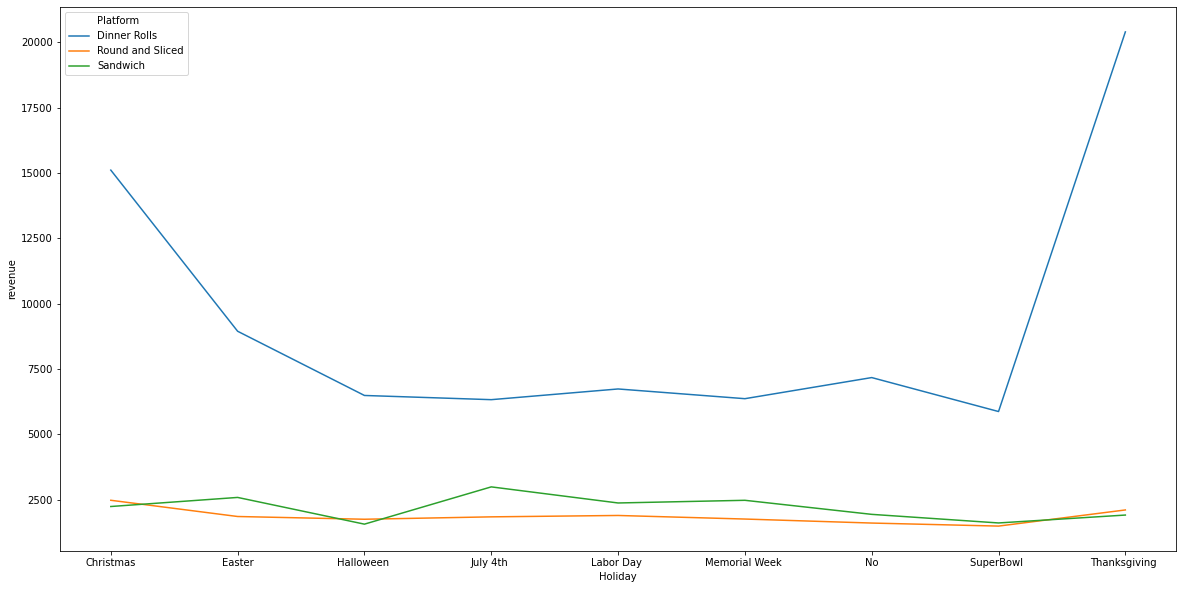

In [13]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Holiday", y="revenue", hue="Platform",data=SDrevenuehol,ci =0)


In [30]:
holiprice=data.loc[data['Holiday']!='No'].groupby(['Holiday','Platform']).agg({'Price per Unit':'mean'}).reset_index()
noholiprice=data.loc[data['Holiday']=='No'].groupby(['Platform','Holiday']).agg({'Price per Unit':'mean'}).reset_index()
noholiprice

,Platform,Holiday,Price per Unit
0,Dinner Rolls,No,3.679135
1,Round and Sliced,No,4.394543
2,Sandwich,No,3.792716


Text(0.1, 3.63, 'Avg.price without holiday for Round and Sliced')

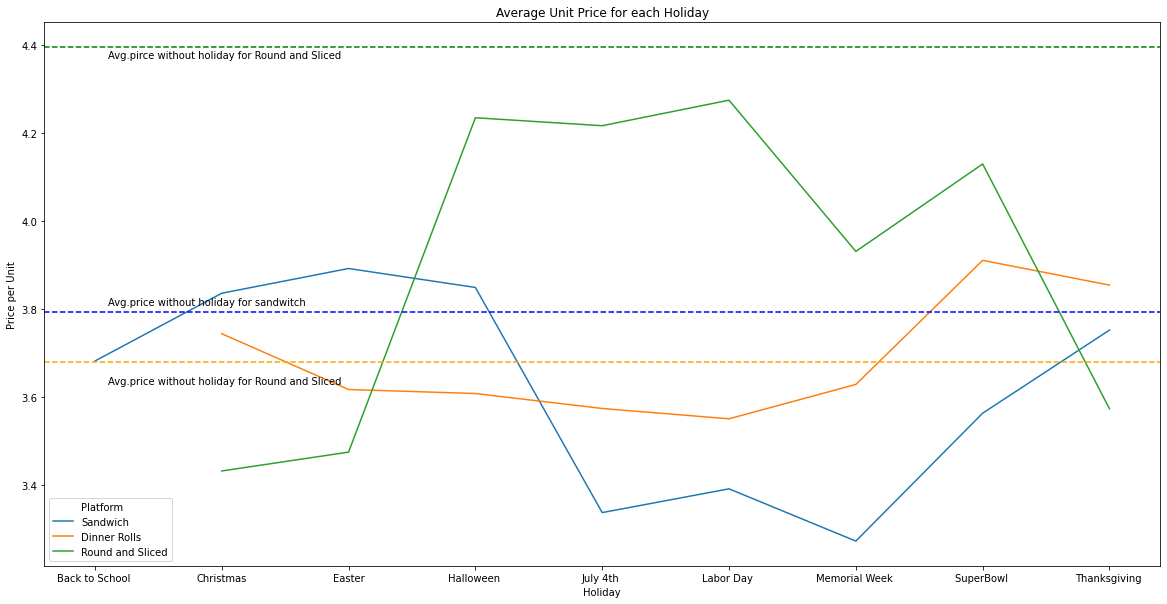

In [33]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Holiday", y="Price per Unit", hue="Platform",data=holiprice,dashes=False,ci=0)
plt.title('Average Unit Price for each Holiday')
plt.axhline(y = noholiprice.iloc[0,2], color = 'orange', linestyle = '--')
plt.axhline(y = noholiprice.iloc[1,2], color = 'Green', linestyle = '--')
plt.axhline(y = noholiprice.iloc[2,2], color = 'blue', linestyle = '--')
plt.annotate("Avg.pirce without holiday for Round and Sliced",
(0.1,4.37),
color = "black",
fontsize = 10)
plt.annotate("Avg.price without holiday for sandwitch",
(0.1,3.81),
color = "black",
fontsize = 10)
plt.annotate("Avg.price without holiday for Round and Sliced",
(0.1,3.63),
color = "black",
fontsize = 10)